# Network Latency Analysis

> This notebook analyzes network latency data obtained from a series of ping tests. The objective is to identify patterns in packet loss and visualize the latency over time.

In [90]:
import pandas as pd
import matplotlib.font_manager
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid')


calibri = {'fontname':'Calibri'}
boldfont = {'fontweight':'bold'}

### Data Import and Processing

In [91]:
# The data is imported from a text file (`ping_test.txt`) and processed into a structured format. 
# Each line represents a ping result, and the necessary details are extracted for further analysis.

file = open('ping_test.txt', 'r')

# We read the data from the text file, stripping out unnecessary line breaks and whitespace.
lines = [line.strip() for line in file.readlines()]
print(lines)

data = [x.split() for x in lines]
data

['64 bytes from 8.8.8.8: seq=0 ttl=58 time=18.834 ms', '64 bytes from 8.8.8.8: seq=1 ttl=58 time=22.746 ms', '64 bytes from 8.8.8.8: seq=2 ttl=58 time=20.971 ms', '64 bytes from 8.8.8.8: seq=3 ttl=58 time=23.698 ms', '64 bytes from 8.8.8.8: seq=4 ttl=58 time=19.551 ms', '64 bytes from 8.8.8.8: seq=5 ttl=58 time=17.358 ms', '64 bytes from 8.8.8.8: seq=6 ttl=58 time=18.406 ms', '64 bytes from 8.8.8.8: seq=7 ttl=58 time=19.688 ms', '64 bytes from 8.8.8.8: seq=8 ttl=58 time=15.534 ms', '64 bytes from 8.8.8.8: seq=9 ttl=58 time=16.535 ms', '64 bytes from 8.8.8.8: seq=10 ttl=58 time=16.041 ms', '64 bytes from 8.8.8.8: seq=11 ttl=58 time=17.083 ms', '64 bytes from 8.8.8.8: seq=12 ttl=58 time=18.106 ms', '64 bytes from 8.8.8.8: seq=13 ttl=58 time=18.689 ms', '64 bytes from 8.8.8.8: seq=14 ttl=58 time=15.688 ms', '64 bytes from 8.8.8.8: seq=15 ttl=58 time=18.278 ms', '64 bytes from 8.8.8.8: seq=16 ttl=58 time=22.622 ms', '64 bytes from 8.8.8.8: seq=17 ttl=58 time=17.714 ms', '64 bytes from 8.8.

[['64', 'bytes', 'from', '8.8.8.8:', 'seq=0', 'ttl=58', 'time=18.834', 'ms'],
 ['64', 'bytes', 'from', '8.8.8.8:', 'seq=1', 'ttl=58', 'time=22.746', 'ms'],
 ['64', 'bytes', 'from', '8.8.8.8:', 'seq=2', 'ttl=58', 'time=20.971', 'ms'],
 ['64', 'bytes', 'from', '8.8.8.8:', 'seq=3', 'ttl=58', 'time=23.698', 'ms'],
 ['64', 'bytes', 'from', '8.8.8.8:', 'seq=4', 'ttl=58', 'time=19.551', 'ms'],
 ['64', 'bytes', 'from', '8.8.8.8:', 'seq=5', 'ttl=58', 'time=17.358', 'ms'],
 ['64', 'bytes', 'from', '8.8.8.8:', 'seq=6', 'ttl=58', 'time=18.406', 'ms'],
 ['64', 'bytes', 'from', '8.8.8.8:', 'seq=7', 'ttl=58', 'time=19.688', 'ms'],
 ['64', 'bytes', 'from', '8.8.8.8:', 'seq=8', 'ttl=58', 'time=15.534', 'ms'],
 ['64', 'bytes', 'from', '8.8.8.8:', 'seq=9', 'ttl=58', 'time=16.535', 'ms'],
 ['64', 'bytes', 'from', '8.8.8.8:', 'seq=10', 'ttl=58', 'time=16.041', 'ms'],
 ['64', 'bytes', 'from', '8.8.8.8:', 'seq=11', 'ttl=58', 'time=17.083', 'ms'],
 ['64', 'bytes', 'from', '8.8.8.8:', 'seq=12', 'ttl=58', 'time

### Data Cleaning and Structuring

> The raw data is split and converted into a Pandas DataFrame for easier manipulation. We extract the sequence number and the time taken for each ping, ensuring the data is in a suitable format for analysis.

In [92]:
df = pd.DataFrame(data)

x = []
y = []

value = 0
for t in df[6]:
    if value < len(data)-1:
        y.append(value)
    else:
        continue
    value+=1
    x.append(float(t[5:]))

# Checks if length of x and y values are the same before creating DataFrame
print(len(x))
print(len(y))

# Checks if the last row is missing
print('The last ping (ms) value in the new dataframe is: ', x[-1], 'ms')

# Create a new dataframe with columns showing only ping (ms) and sequence number
df_ping = pd.DataFrame(x, y, columns=['ping (ms)'])
df_ping

99
99
The last ping (ms) value in the new dataframe is:  19.126 ms


,ping (ms)
0,18.834
1,22.746
2,20.971
3,23.698
4,19.551
...,...
94,19.354
95,16.473
96,19.197
97,16.237


In [131]:
# Shows the number of packets transmitted, mean ping, min/max latency in ms

pings = df_ping.describe()
print(pings)

print('\nNumber of packets sent & received: ', pings.iloc[0, 0], 'ms')
print('The mean ping was: ', pings.iloc[1, 0].round(2), 'ms')
print('The maximum ping was: ', pings.iloc[7, 0].round(2), 'ms')
print('The minimum ping was: ', pings.iloc[3, 0].round(2), 'ms')


       ping (ms)
count  99.000000
mean   18.060707
std     2.886229
min    14.522000
25%    15.949000
50%    17.541000
75%    19.430000
max    37.170000

Number of packets sent & received:  99.0 ms
The mean ping was:  18.06 ms
The maximum ping was:  37.17 ms
The minimum ping was:  14.52 ms


### Data Visualization

> The cleaned data is visualized to showcase the packet loss.

The max value was at sequence nr.:      ping (ms)
27      37.17


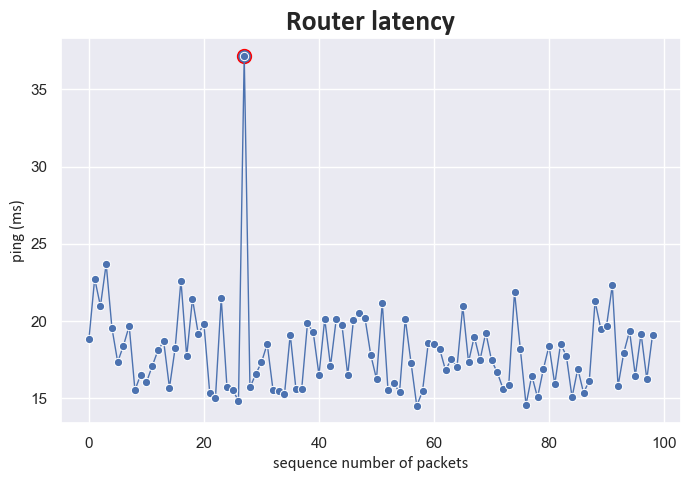

In [144]:
# The x-axis represents the sequence of pings, while the y-axis shows the time taken in milliseconds. 
# The plot helps in identifying any anomalies or patterns in the data, which is useful for diagnosing network issues.

plt.figure(figsize=(8,5))

# The processed data is plotted to visualize the latency over time, helping to identify packet loss occurrences.

# Example 1: Matplotlib plot
#plt.plot(df_ping.index, df_ping['ping (ms)'], marker='o', linewidth=2)

# Example 2: Seaborn plot
sns.lineplot(
    x=df_ping.index, 
    y=df_ping['ping (ms)'], 
    marker='o', 
    linewidth=1, 
    color='b', 
    linestyle='-',
    zorder=6
)

plt.xlabel('sequence number of packets', 
           **calibri, 
           fontdict={'fontsize': 12})
plt.ylabel('ping (ms)', 
           **calibri, 
           fontdict={'fontsize': 12})
plt.title('Router latency', 
          **calibri, 
          fontdict={'fontweight':'bold', 'fontsize': 20})

# Highlighting the max ping spike
print('The max value was at sequence nr.: ', df_ping.loc[df_ping['ping (ms)'] == pings.iloc[7, 0]])
highlight_index = 27
highlight_value = df_ping.loc[highlight_index, 'ping (ms)']
plt.scatter(highlight_index, highlight_value, s=100, edgecolor='red', zorder=5)